# **Phase 1**

## **1: Problem Statement**

### **1.1.1 Problem Statement**
This project’s goal is to make a detailed analysis on why road accidents are occurring a lot and in what trend, will be helpful in improving road safety measures & make the policy options which can reduce the number of accidents. This research would help to know the impacts of accident severity on the driver attributes, vehicle conditions, surface conditions and environmental conditions.

### **1.1.2 Potential Contribution & Importance**
Road accidents pose a threat to health globally by resulting in significant fatalities and injuries of individuals worldwide. This evaluation plays a role in finding factors that play a vital role in accident prevention. The evidence of this review may support the implementation of measures of safety, improvement of driver education programs, and modification of road systems that can reduce accidents and save lives.

## **2: Ask Questions**

### Bhuvan Thirwani: 

#### **Question 1**:
##### ***How does driving experience, gender, educational level affect the severity of accidents? What is the corelation between total casualties & accident's severity***
#### **Hypothesis**
##### **There should be no effect of sex of the driver on casualties and accident severity. Higher education must have low casualities and less severity. Higher driving experience must have lower casualities & less severity**

#### **Question 2**:
##### **Analyzing how the fatality ratio is related with various factors such as light conditions, weather conditions, type of collision & day of the week in traffic accidents. Finding patterns and correlations which can suggest road safety strategies.**

#### **Hypothesis**
##### **Dark Lighting, Rainy Weather Conditions should have more fatal rate. On Busy days, fatal ratio should be high as outside is overcrowded & Pedestrian should have the highest fatal ratio.** 

#### Harshit Malpani: 50608809

#### Question 1:
What vehicles should the authorities focus more on to reduce the cases of road accidents and the severity of the road accidents

#### Question 2:
Does the service period of the vehicle and ownership of the vehicle have any correlation with the accidents

#### Piyush Gulhane: 

#### Question 1:

#### Question 2:

## **3: Data Retrieval**

The dataset has been taken from KAGGLE. For this task, we have uploaded a copy of the dataset to a github repository and downloading the data from the github repository directly to the dataframe

In [35]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
dataset = pd.read_csv('https://raw.githubusercontent.com/hmalpani/RTA-Dataset/main/RTA_Dataset.csv')

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [39]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## **4: Data Cleaning**

### 1) Remove Duplicate Values:
Removing duplicate values is an essential step of data cleaning for any data science project. It helps in reducing the bias where certain data points are represented multiple times. If the duplicate values are not removed, it can skew the results and therefore lead to incorrect conclusions

In [43]:
# Remove duplicates
cleaned_dataset = dataset.drop_duplicates()

### 2) Validation

In [46]:
# Remove entries with 'Number_of_vehicles_involved' = 0
cleaned_dataset = cleaned_dataset[cleaned_dataset['Number_of_vehicles_involved'] != 0]

### 3) Detection and Removal of Outliers

In [49]:
# code for outliers handling

numerical_columns = ['Number_of_vehicles_involved', 'Number_of_casualties']
for column in numerical_columns:
    if not pd.api.types.is_numeric_dtype(cleaned_dataset[column]):
        print(f"Column '{column}' should be numeric but contains non-numeric data.")

def detect_outliers(column):
    Q1 = cleaned_dataset[column].quantile(0.05)
    Q3 = cleaned_dataset[column].quantile(0.95)
    IQR = Q3 - Q1
    outliers = cleaned_dataset[(cleaned_dataset[column] < (Q1 - 1.5 * IQR)) | (cleaned_dataset[column] > (Q3 + 1.5 * IQR))]
    return outliers

for column in numerical_columns:
    outliers = detect_outliers(column)
    if not outliers.empty:
        print(f"Outliers detected in column '{column}':\n", outliers.shape)

def remove_outliers(df, column):
    Q1 = cleaned_dataset[column].quantile(0.05)
    Q3 = cleaned_dataset[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return cleaned_dataset[(cleaned_dataset[column] >= lower_bound) & (cleaned_dataset[column] <= upper_bound)]

print("Shape before removing outliers:", cleaned_dataset.shape)
# Remove outliers from both columns
cleaned_dataset = remove_outliers(cleaned_dataset, 'Number_of_vehicles_involved')
cleaned_dataset = remove_outliers(cleaned_dataset, 'Number_of_casualties')

# Check the shape of the DataFrame after removal
print("Shape after removing outliers:", cleaned_dataset.shape)

Outliers detected in column 'Number_of_vehicles_involved':
 (7, 32)
Shape before removing outliers: (12316, 32)
Shape after removing outliers: (12309, 32)


### 4) Handling Missing Values:
In this step of Data Cleaning, we either remove or impute the missing values in the dataset

In [52]:
# Find the number of missing values
missing_value_count = cleaned_dataset.isnull().sum()
missing_value_count

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3923
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                306
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [54]:
dataset_columns = cleaned_dataset.columns.tolist()
missing_values_columns = missing_value_count[missing_value_count > 0].index.tolist()
print(missing_values_columns)

['Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality']


In [56]:
# Replace missing values
cleaned_dataset['Educational_level'].fillna(cleaned_dataset['Educational_level'].mode()[0], inplace=True)
cleaned_dataset['Vehicle_driver_relation'].fillna('Unknown', inplace=True)
cleaned_dataset['Driving_experience'].fillna(cleaned_dataset['Driving_experience'].mode()[0], inplace=True)
cleaned_dataset['Type_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Owner_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Service_year_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Defect_of_vehicle'].fillna('No defect', inplace=True)
cleaned_dataset['Area_accident_occured'].fillna('Unknown', inplace=True)
cleaned_dataset['Lanes_or_Medians'].fillna('Unknown', inplace=True)
cleaned_dataset['Road_allignment'].fillna('Unknown', inplace=True)
cleaned_dataset['Types_of_Junction'].fillna('Unknown', inplace=True)
cleaned_dataset['Road_surface_type'].fillna('Unknown', inplace=True)
cleaned_dataset['Type_of_collision'].fillna('Unknown', inplace=True)
cleaned_dataset['Vehicle_movement'].fillna('Unknown', inplace=True)
cleaned_dataset['Work_of_casuality'].fillna('Unknown', inplace=True)
cleaned_dataset['Fitness_of_casuality'].fillna('Unknown', inplace=True)

### 5) Correcting Errors:
In this data cleaning, we identify and fix the errors or incosistencies present in the data

In [59]:
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Lorry (41?100Q)', 'Lorry (41 - 100 Q)')
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Lorry (11?40Q)', 'Lorry (11 - 40 Q)')
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Public (13?45 seats)', 'Public (13 - 45 seats)')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('  Recreational areas', 'Recreational areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('  Market areas', 'Market areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Church areas', 'Church areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Hospital areas', 'Hospital areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Industrial areas', 'Industrial areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Outside rural areas', 'Outside rural areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('Rural village areasOffice areas', 'Rural Office areas')
cleaned_dataset['Road_allignment'] = cleaned_dataset['Road_allignment'].replace('Tangent road with mountainous terrain and', 'Tangent road with mountainous terrain')
cleaned_dataset['Fitness_of_casuality'] = cleaned_dataset['Fitness_of_casuality'].replace('NormalNormal', 'Normal')
cleaned_dataset['Casualty_severity'] = cleaned_dataset['Casualty_severity'].replace('na', 'Unknown')

### 6) Standardize the Data
a) Convert all the entries in `Time` column to a consistent format.<br>
b) Convert `Over 51` to `51 and Over` in the `Age_band_of_driver` column

In [62]:
# Standardize the 'Time' column
cleaned_dataset['Time'] = pd.to_datetime(cleaned_dataset['Time'], format='%H:%M:%S').dt.time
# Make 'Over 51' to '51 and Over' for Driver Age band
cleaned_dataset['Age_band_of_driver'] = cleaned_dataset['Age_band_of_driver'].replace('Over 51', '51 and Over')

### 7) Parsing the data
Convert all the text in the dataset to lowercase to ensure consistency. This helps in avoiding the situations where same words with different cases are considered different

In [65]:
# Make all the characters to lowercase
cleaned_dataset = cleaned_dataset.map(lambda x: x.lower() if isinstance(x, str) else x)

### 8) Feature Engineering

In [68]:
print(cleaned_dataset['Time'].head())
cleaned_dataset['Hour'] = pd.to_datetime(cleaned_dataset['Time'], format='%H:%M:%S').dt.hour
Time_of_dat = ['Night', 'Morning', 'Noon', 'Evening']

def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 2
    elif 12 <= hour < 17:
        return 3
    elif 17 <= hour < 21:
        return 4
    else:
        return 1


cleaned_dataset['Time_of_day'] = cleaned_dataset['Hour'].apply(categorize_time_of_day)

print("Data head after categorizing and encoding Time_of_day:\n")
cleaned_dataset[['Time', 'Hour', 'Time_of_day']].head()


0    17:02:00
1    17:02:00
2    17:02:00
3    01:06:00
4    01:06:00
Name: Time, dtype: object
Data head after categorizing and encoding Time_of_day:



,Time,Hour,Time_of_day
0,17:02:00,17,4
1,17:02:00,17,4
2,17:02:00,17,4
3,01:06:00,1,1
4,01:06:00,1,1


#### 9) One Hot Encoding

In [71]:
from sklearn.preprocessing import OneHotEncoder

encoding_dict = {
    'Day_of_week': 'ordinal',
    'Age_band_of_driver': 'ordinal',
    'Sex_of_driver': 'one_hot',
    'Educational_level': 'ordinal',
    'Vehicle_driver_relation': 'one_hot',
    'Driving_experience': 'ordinal',
    'Type_of_vehicle': 'one_hot',
    'Owner_of_vehicle': 'one_hot',
    'Service_year_of_vehicle': 'ordinal',
    'Defect_of_vehicle': 'one_hot',
    'Area_accident_occured': 'one_hot',
    'Lanes_or_Medians': 'one_hot',
    'Road_allignment': 'one_hot',
    'Types_of_Junction': 'one_hot',
    'Road_surface_type': 'one_hot',
    'Road_surface_conditions': 'ordinal',
    'Light_conditions': 'one_hot',
    'Weather_conditions': 'one_hot',
    'Type_of_collision': 'one_hot',
    'Vehicle_movement': 'one_hot',
    'Casualty_class': 'one_hot',
    'Sex_of_casualty': 'one_hot',
    'Age_band_of_casualty': 'ordinal',
    'Casualty_severity': 'ordinal',
    'Work_of_casuality': 'one_hot',
    'Fitness_of_casuality': 'one_hot',
    'Pedestrian_movement': 'one_hot',
    'Cause_of_accident': 'one_hot',
    'Accident_severity': 'ordinal'
}

ordinal_mappings = {
    'Day_of_week': {
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
        'Friday': 4, 'Saturday': 5, 'Sunday': 6, 'Unknown': -1
    },
    'Age_band_of_driver': {
        'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, 'Unknown': -1
    },
    'Educational_level': {
        'Illiterate': 0, 'Writing & reading': 1, 'Elementary school': 2,
        'Junior high school': 3, 'High school': 4, 'Above high school': 5,
        'Unknown': -1
    },
    'Driving_experience': {
        'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2, '2-5yr': 3, '5-10yr': 4,
        'Above 10yr': 5, 'unknown': -1
    },
    'Service_year_of_vehicle': {
        'Below 1yr': 0, '1-2yr': 1, '2-5yrs': 2, '5-10yrs': 3,
        'Above 10yr': 4, 'Unknown': -1
    },
    'Road_surface_conditions': {
        'Dry': 0, 'Wet or damp': 1, 'Snow': 2, 'Flood over 3cm. deep': 3, 'Unknown': -1
    },
    'Age_band_of_casualty': {
        'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, '5': 4, 'na': -1, 'Unknown': -1
    },
    'Casualty_severity': {
        '3': 0, '2': 1, '1': 2, 'na': -1, 'Unknown': -1
    },
    'Accident_severity': {
        'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2, 'Unknown': -1
    }
}

def apply_onehot_encoding(df, encoding_dict, ordinal_mappings):
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

    for column, encoding_type in encoding_dict.items():
        if encoding_type == 'one_hot':
            one_hot_encoded_df = pd.get_dummies(df[column], prefix=column, drop_first=True)
            df = pd.concat([df, one_hot_encoded_df], axis=1)
    return df

cleaned_dataset = apply_onehot_encoding(cleaned_dataset, encoding_dict, ordinal_mappings)

cleaned_dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Cause_of_accident_no distancing,Cause_of_accident_no priority to pedestrian,Cause_of_accident_no priority to vehicle,Cause_of_accident_other,Cause_of_accident_overloading,Cause_of_accident_overspeed,Cause_of_accident_overtaking,Cause_of_accident_overturning,Cause_of_accident_turnover,Cause_of_accident_unknown
0,17:02:00,monday,18-30,male,above high school,employee,1-2yr,automobile,owner,above 10yr,...,False,False,False,False,False,False,False,False,False,False
1,17:02:00,monday,31-50,male,junior high school,employee,above 10yr,public (> 45 seats),owner,5-10yrs,...,False,False,False,False,False,False,True,False,False,False
2,17:02:00,monday,18-30,male,junior high school,employee,1-2yr,lorry (41 - 100 q),owner,unknown,...,False,False,False,False,False,False,False,False,False,False
3,01:06:00,sunday,18-30,male,junior high school,employee,5-10yr,public (> 45 seats),governmental,unknown,...,False,False,False,False,False,False,False,False,False,False
4,01:06:00,sunday,18-30,male,junior high school,employee,2-5yr,unknown,owner,5-10yrs,...,False,False,False,False,False,False,True,False,False,False


#### 10) Ordinal Encoding

In [74]:
def apply_ordinal_encoding(df, encoding_dict, ordinal_mappings):
    for column, encoding_type in encoding_dict.items():
        if encoding_type == 'ordinal':
            # Apply ordinal encoding using a mapping dictionary
            if column in ordinal_mappings:
                df[f"{column}_ordinal"] = df[column].map(ordinal_mappings[column])
            else:
                print(f"No ordinal mapping provided for column: {column}")
    return df

cleaned_dataset = apply_ordinal_encoding(cleaned_dataset, encoding_dict, ordinal_mappings)

cleaned_dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Cause_of_accident_unknown,Day_of_week_ordinal,Age_band_of_driver_ordinal,Educational_level_ordinal,Driving_experience_ordinal,Service_year_of_vehicle_ordinal,Road_surface_conditions_ordinal,Age_band_of_casualty_ordinal,Casualty_severity_ordinal,Accident_severity_ordinal
0,17:02:00,monday,18-30,male,above high school,employee,1-2yr,automobile,owner,above 10yr,...,False,NaN,1.0,NaN,2.0,NaN,NaN,-1.0,NaN,NaN
1,17:02:00,monday,31-50,male,junior high school,employee,above 10yr,public (> 45 seats),owner,5-10yrs,...,False,NaN,2.0,NaN,NaN,3.0,NaN,-1.0,NaN,NaN
2,17:02:00,monday,18-30,male,junior high school,employee,1-2yr,lorry (41 - 100 q),owner,unknown,...,False,NaN,1.0,NaN,2.0,NaN,NaN,2.0,0.0,NaN
3,01:06:00,sunday,18-30,male,junior high school,employee,5-10yr,public (> 45 seats),governmental,unknown,...,False,NaN,1.0,NaN,4.0,NaN,NaN,1.0,0.0,NaN
4,01:06:00,sunday,18-30,male,junior high school,employee,2-5yr,unknown,owner,5-10yrs,...,False,NaN,1.0,NaN,3.0,3.0,NaN,-1.0,NaN,NaN


## **5: Exploratory Data Analysis (EDA)**

### Bhuvan Thirwani: 

### Question 1:
 **How does driving experience, gender, educational level affect the severity of accidents? What is the corelation between total casualties & accident's severity?**
### **Hypothesis**
#### **There should be no effect of sex of the driver on casualties and accident severity. Higher education must have low casualities and less severity. Higher driving experience must have lower casualities & less severity**

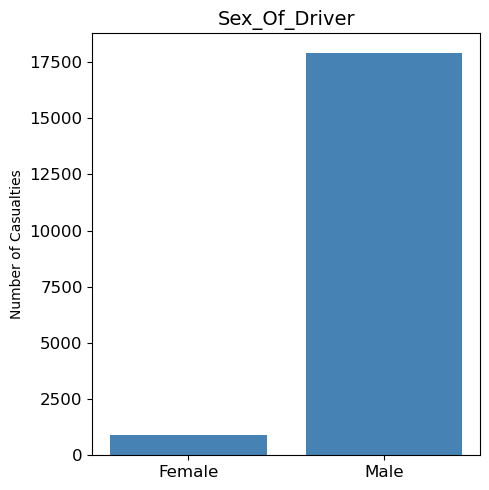

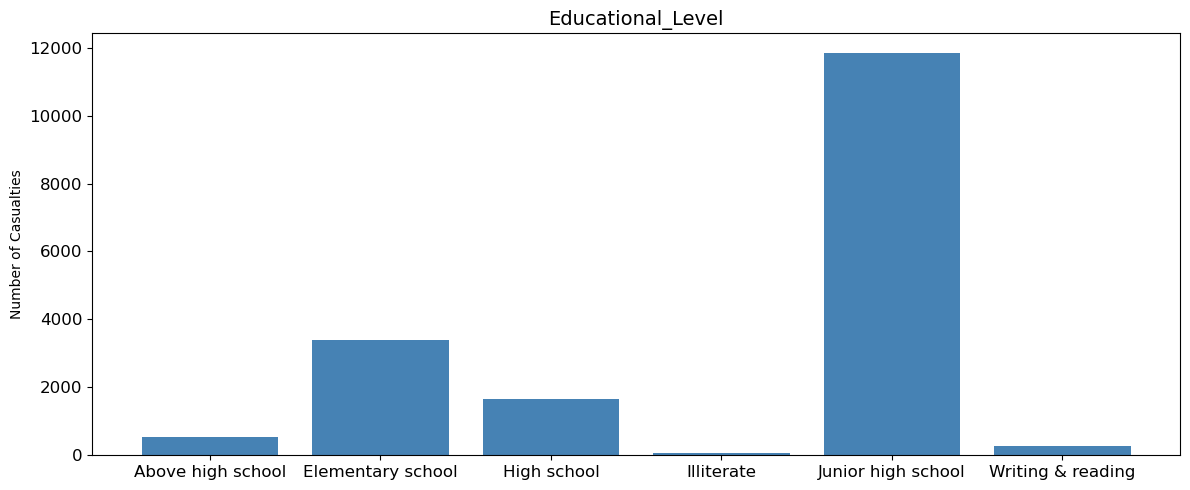

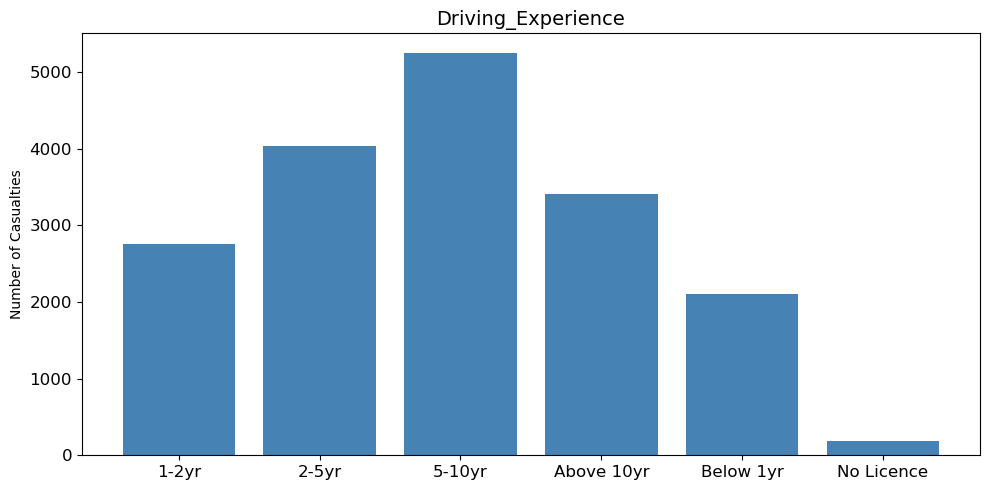

In [79]:
df=dataset
plt.figure(figsize=(5, 5))
col = 'Sex_of_driver'
df_known = df[~df[col].str.lower().isin(['unknown'])]
plot_data = df_known.groupby(col)['Number_of_casualties'].sum().reset_index()
plt.bar(plot_data[col], plot_data['Number_of_casualties'], color='steelblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(col.title(), fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Casualties')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
col = 'Educational_level'
df_known = df[~df[col].str.lower().isin(['unknown'])]
plot_data = df_known.groupby(col)['Number_of_casualties'].sum().reset_index()
plt.bar(plot_data[col], plot_data['Number_of_casualties'], color='steelblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(col.title(), fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Casualties')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
col = 'Driving_experience'
df_known = df[~df[col].str.lower().isin(['unknown'])]
plot_data = df_known.groupby(col)['Number_of_casualties'].sum().reset_index()
plt.bar(plot_data[col], plot_data['Number_of_casualties'], color='steelblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(col.title(), fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Casualties')
plt.tight_layout()
plt.show() 

### **Outcomes and Insights**

#### **Driving Experience**
* **Observation:** The bar chart shows that drivers with 5-10 years of experience are involved in the most accidents, while those without a license have the fewest.
* **Hypothesis Testing:** Contrary to the hypothesis, higher driving experience does not necessarily correlate with fewer casualties or less severity. This suggests that other factors might influence accident outcomes.

#### **Educational Level**
* **Observation:** The majority of drivers involved in accidents have a junior high school education. Higher education levels seem to have fewer casualties.
* **Hypothesis Testing:** This supports the hypothesis that higher education correlates with fewer casualties, possibly due to better risk assessment and decision-making skills.

#### **Sex of Driver**
* **Observation:** A significantly higher number of male drivers are involved in accidents compared to female drivers.
* **Hypothesis Testing:** The data challenges the hypothesis that sex has no effect on casualties and accident severity. Male drivers appear more frequently in accident data, suggesting gender may play a role.

### **Feature Engineering**
* **Observation:** Almost all the categorical variables have a biased group length.
* **Learning:** We will be using Oversampling methods for making the groups rows count comparable for each column 

## Question 2:
### **Analyzing how the fatality ratio is related with various factors such as light conditions, weather conditions, type of collision & day of the week in traffic accidents. Finding patterns and correlations which can suggest road safety strategies.**

### **Hypothesis**
#### **Dark Lighting, Rainy Weather Conditions should have more fatal rate. On Busy days, fatal ratio should be high as outside is overcrowded & Pedestrian should have the highest fatal ratio.** 

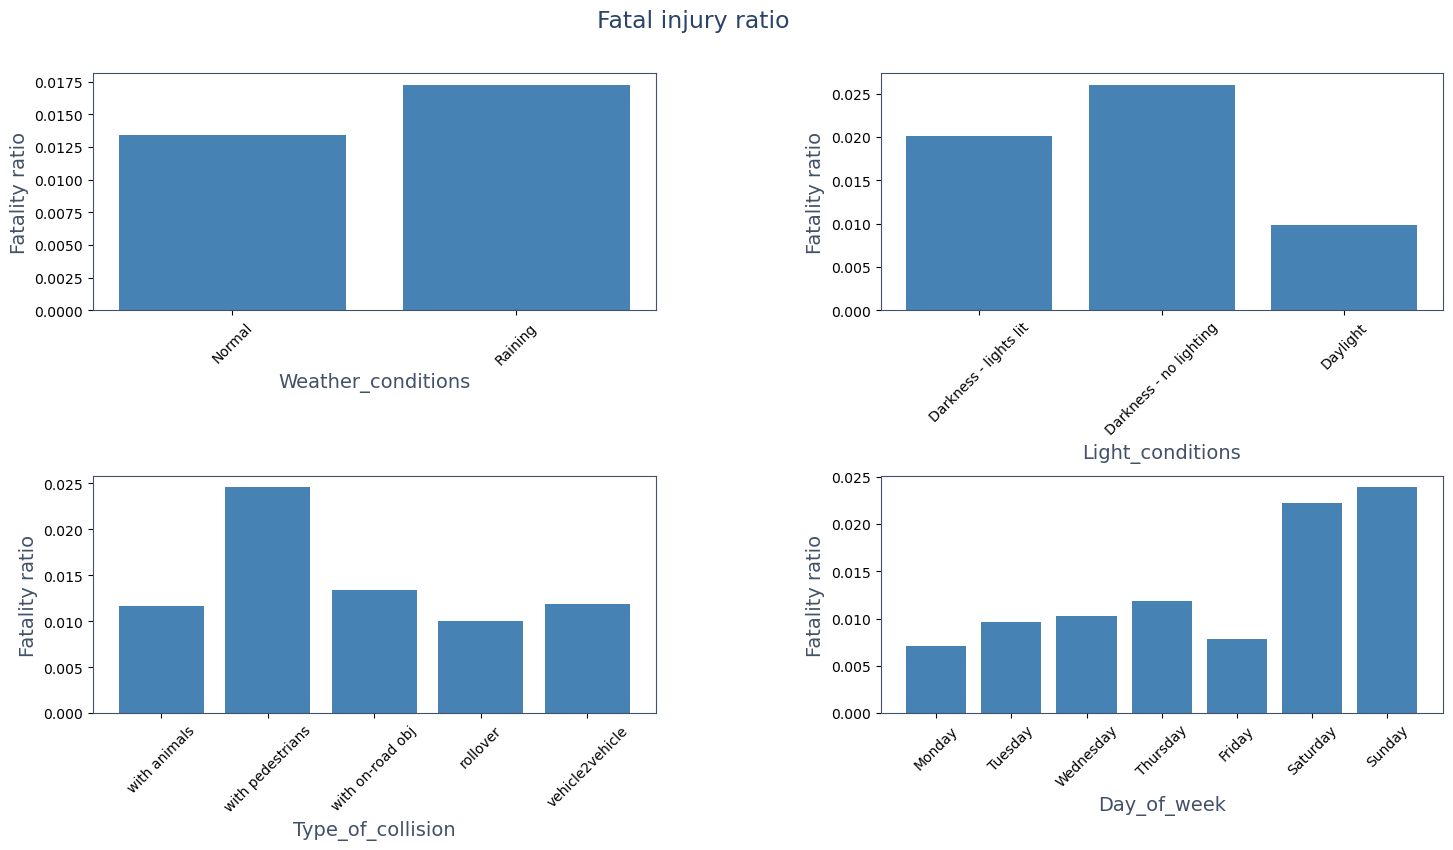

In [83]:
df=dataset
def calculate_fatility_ratio(column, df=dataset, sort=False):
    df = df[df[column] != 'Unknown']
    _df = df.groupby(['Accident_severity', column]).Time.count().reset_index()
    rowlist = [row for row in _df[column]]
    time_sum = []
    for row in rowlist:
        time_sum.append(_df.loc[_df[column] == row].Time.sum())

    _df['time_sum'] = time_sum
    _df['fatal_ratio'] = _df['Time'] / _df['time_sum']
    df_with_fatal_ratio = _df.loc[_df.Accident_severity == 'Fatal injury']
    if sort:
        df_with_fatal_ratio = df_with_fatal_ratio.sort_values(by='fatal_ratio')
    return df_with_fatal_ratio

df_with_fatal_ratio = calculate_fatility_ratio('Type_of_collision', df, sort=True)

def plot_fatal_graphs(ax, column, red_list, df, order=None, custom_labels=None):
    fatal_data = calculate_fatility_ratio(column, df)

    if order is not None:
        fatal_data[column] = pd.Categorical(fatal_data[column], categories=order, ordered=True)
        fatal_data = fatal_data.sort_values(column)

    x_labels = fatal_data[column]
    y_values = fatal_data['fatal_ratio']

    bars = ax.bar(x_labels, y_values, color='steelblue')

    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=45)
        
    if custom_labels is not None:
        ax.set_xticks(range(len(custom_labels)))
        ax.set_xticklabels(custom_labels, rotation=45)
    else:
        ax.set_xticks(range(len(x_labels)))
        ax.set_xticklabels(x_labels, rotation=45)
    
    ax.set_xlabel(column, fontsize=14, color='#425169')
    ax.set_ylabel('Fatality ratio', fontsize=14, color='#425169')
    ax.spines['bottom'].set_color('#425169')
    ax.spines['left'].set_color('#425169')
    ax.spines['top'].set_color('#425169')
    ax.spines['right'].set_color('#425169')

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
plt.suptitle("Fatal injury ratio", fontsize=17, color='#2c4369')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plot_fatal_graphs(axs[0, 0], 'Weather_conditions', [1], df)
plot_fatal_graphs(axs[0, 1], 'Light_conditions', [1], df)
plot_fatal_graphs(axs[1, 0], 'Type_of_collision', [1], df, custom_labels=['with animals', 'with pedestrians', 'with on-road obj', 'rollover', 'vehicle2vehicle'])
plot_fatal_graphs(axs[1, 1], 'Day_of_week', [-1, -2], df, order=day_order)

plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.4, hspace=0.7)
plt.show()

#### **Insights from Visualizations**

##### **Fatal Injury Ratio for different categories**

###### **Number of Vehicles Involved:**
* Accidents involving fewer vehicles tend to have higher fatality ratios.

###### **Light Conditions:**
* Darkness with no lighting has a high fatality ratio which indicates poor visibility can be a risk factor.

###### **Weather Conditions:**
* Rainy conditions correlate with higher fatality ratios compared to normal weather.

###### **Type of Collision:**
* Collisions with pedestrians and vehicle with vehicle have the highest fatality ratios.

###### **Day of Week:**
* Saturdays and Sundays shows higher fatality ratios which suggests weekends have more severe accidents.

#### **Recommendations for Feature Engineering**

##### **Feature Selection and Transformation**
* **Select Relevant Features:** We should prioritize features like Light_conditions, number of vehicles involved and Type_of_collision due to their strong correlation with fatality ratios.
* **Create New Features:** Develop a composite feature for risk assessment combining Light_conditions and Weather_conditions to capture environmental risk factors.

#### **Conclusion**
##### **Our Hypothesis is 100% correct.**